In [1]:
%pylab inline
%config InlineBackend.figure_format='retina'

Populating the interactive namespace from numpy and matplotlib


In [2]:
%gui qt

In [83]:
fet = np.fromfile('./fet.bin', dtype=np.int32)

In [86]:
fet = np.memmap('./fet.bin', 'int32')

In [87]:
fet = fet.reshape(-1, 7)

In [88]:
fet.shape

(62065, 7)

In [89]:
fet_info = fet[:, :2]

In [90]:
fet_val = fet[:,2:-1]

In [91]:
label = fet[:, -1]

In [94]:
fet_val

memmap([[-5778,  -671,  1014,  1191],
        [ 3912, -9657,  5311,  1863],
        [-3585,  5626,  -211,  1037],
        ...,
        [-6126,  6841,   222,  3688],
        [ 6198, -3431, -4281, -1230],
        [-1833,  3638, -3682,  1624]], dtype=int32)

In [95]:
idx = np.where(fet_info[:,1]==4)[0]

In [96]:
idxx = np.where(fet_info[:,1]!=4)[0]

In [97]:
fet_label = label[idx]

In [98]:
fet_label

array([ 4, 11,  7, ..., 16,  3,  1], dtype=int32)

In [99]:
np.where(label[idxx]!=0)[0]

array([], dtype=int64)

In [102]:
vq = np.load('./vq.npy').item(0)

In [103]:
vq['labels'][4]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3,
       4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 0, 4, 4, 4, 4, 4, 4], dtype=int32)

In [104]:
vq['labels'].keys()

[4]

In [105]:
vq

{'labels': {4: array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
         1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2,
         2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3,
         4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4,
         4, 4, 4, 4, 4, 0, 4, 4, 4, 4, 4, 4], dtype=int32)},
 'points': {4: array([[-9.93319899e-02,  4.04644459e-02,  9.41681638e-02,
          -5.93530349e-02],
         [-3.44685395e-03,  1.29352920e-02,  1.43543677e-02,
           5.28469793e-02],
         [-6.30039647e-02,  1.49292396e-02, -4.79442813e-02,
           1.62875801e-02],
         [ 2.42338683e-02, -8.36050436e-02, -4.58367281e-02,
           1.78694129e-02],
         [-3.45849507e-02, -2.19525937e-02,  1.42053491e-03,
          -2.17110235e-02],
         [-1.83889251e-02,  2.86260489e-02, -3.05222441e-02,
           3.31444410e-03],
         [ 8.43386445e-03,  6.44931570e-02,  8.65390748e-02,
           3.11177

In [106]:
vq['labels'][4][fet_label]

array([0, 0, 0, ..., 0, 0, 0], dtype=int32)

In [107]:
from spiketag.view import scatter_3d_view

In [108]:
sd_view = scatter_3d_view()

In [109]:
sd_view.set_data(fet_val[fet_info[:,1]==4], vq['labels'][4][fet_label])

In [110]:
sd_view.show()

In [529]:
pynq_ip = '10.102.20.105'

In [532]:
pynq = socket.create_connection((pynq_ip, '2222'), timeout=1)
pynq.setblocking(1)
pynq.setsockopt(socket.IPPROTO_TCP, socket.TCP_NODELAY, 1)

In [533]:
def reward(time):
    pynq.send('reward, {}'.format(time))

In [534]:
reward(1)

In [537]:
scv = []
last_t = 0
while True:
    _scv = np.fromfile('./scv.bin')
    try:
        t  = _scv[0]
        fr = _scv[1:]/200e-3
        if last_t != t:
#             print t, _scv[1:]
        ##########################################################
            if fr[4]>20:
                print('firing rate of group 4 pass threshold')
        ##########################################################
            scv.append(_scv)
        last_t = t
    except:
        pass
    finally:
        np.array(scv).tofile('./spike_count_vector.bin')

KeyboardInterrupt: 

In [538]:
x = np.fromfile('./spike_count_vector.bin').reshape(-1,31)

In [539]:
frame = x[:, 0]
scv = x[:, 1:]/200e-3

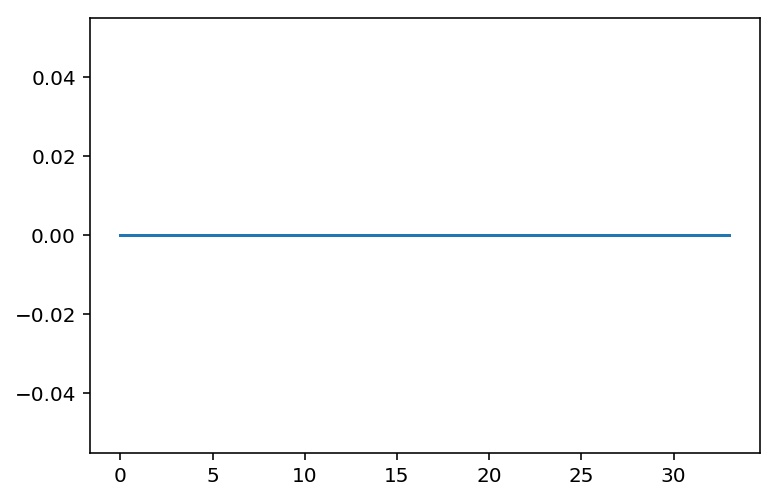

In [540]:
plot(scv[:300, 4])